In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy, pylab
import stft
from pandas import DataFrame
from sklearn import svm, metrics
from sklearn.model_selection import cross_val_score

In [3]:
train_in = pd.read_csv('data/train_input.csv', sep=';')
train_out = pd.read_csv('data/train_output.csv', sep=';')

In [4]:
test_in = pd.read_csv('data/test_input.csv', sep=';')

In [5]:
fulldf = pd.merge(train_in, train_out, on='ID')

In [6]:
fulldf

,ID,DEVICE,EEG_0,EEG_1,EEG_2,EEG_3,EEG_4,EEG_5,EEG_6,EEG_7,...,EEG_74992,EEG_74993,EEG_74994,EEG_74995,EEG_74996,EEG_74997,EEG_74998,EEG_74999,HYPNOGRAM,TARGET
0,0,0.0,18.513157,17.887674,17.442404,16.944677,16.080168,15.002975,13.949936,13.029482,...,-11.230370,-11.445168,-11.626509,-11.631254,-11.295610,-10.671482,-9.810492,-9.003139,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",32
1,1,0.0,3.377115,3.720635,4.122524,4.086743,3.476264,2.501397,1.601755,0.721100,...,-7.700051,-5.312872,-2.887947,-1.066923,0.143711,1.566658,3.194142,4.335758,"['0', '0', '0', '0', '0', '0', '2', '0', '0', ...",29
2,2,0.0,20.753752,33.122223,41.263256,44.764065,45.441994,44.729267,42.983265,40.561638,...,0.194748,-1.819428,-3.309473,-4.242142,-4.506508,-4.677623,-4.937207,-4.994258,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",36
3,3,0.0,14.535362,14.571295,14.288245,13.808476,13.219709,12.498644,11.697461,10.954629,...,3.678608,3.307606,3.170362,3.239853,3.253531,3.081603,2.759164,2.302796,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",56
4,4,1.0,0.000006,0.000006,0.000006,0.000009,0.000008,0.000011,0.000009,0.000010,...,0.000032,0.000027,0.000025,0.000022,0.000021,0.000019,0.000019,0.000022,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",60
5,5,0.0,2.157661,0.553162,-1.216814,-3.066420,-4.871763,-6.431633,-7.552323,-8.112910,...,25.711145,24.377981,23.501120,22.964960,22.642601,22.380957,22.008242,21.509195,"['0', '0', '0', '0', '0', '0', '1', '0', '1', ...",39
6,6,0.0,-22.688078,-20.044596,-18.404722,-17.891281,-17.701622,-17.365948,-16.553183,-14.829457,...,3.275542,3.680151,3.597312,2.975679,2.409734,2.445321,2.437376,2.021164,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",36
7,7,0.0,8.684734,7.225457,6.008805,5.098927,4.470098,4.015224,3.712195,3.736494,...,5.003548,3.850974,2.595649,1.751041,1.560075,1.707247,1.852457,1.918286,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",37
8,8,0.0,-13.450840,-12.854297,-12.293760,-11.689228,-11.025227,-10.463305,-10.184059,-10.152052,...,4.806968,5.100900,5.459562,5.899413,6.258317,6.391021,6.245914,5.818482,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",58
9,9,0.0,2.217397,4.484025,6.651739,8.349331,9.585050,10.654525,11.748752,12.789876,...,-40.908005,-39.731171,-38.428715,-36.836124,-34.850094,-32.429379,-29.734104,-27.193937,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",40


In [7]:
fulldf0 = fulldf[fulldf['DEVICE']==0.0]
fulldf1 = fulldf[fulldf['DEVICE']==1.0]

In [9]:
def stft(x, fs, framesz, hop):
    framesamp = int(framesz*fs)
    hopsamp = int(hop*fs)
    w = scipy.hanning(framesamp)
    X = scipy.array([scipy.fft(w*x[i:i+framesamp]) ])

In [10]:
y = fulldf[fulldf.DEVICE==0.0]['TARGET']

In [11]:
xmin = fulldf.iloc[np.argmin(y), 2:-2]
xmax = fulldf.iloc[np.argmax(y), 2:-2]

In [12]:
from scipy.signal import spectrogram

In [13]:
specgram_min = spectrogram(xmin)
specgram_max = spectrogram(xmax)

In [14]:
fs = len(xmin)/(5*60)
print(fs)

250.0


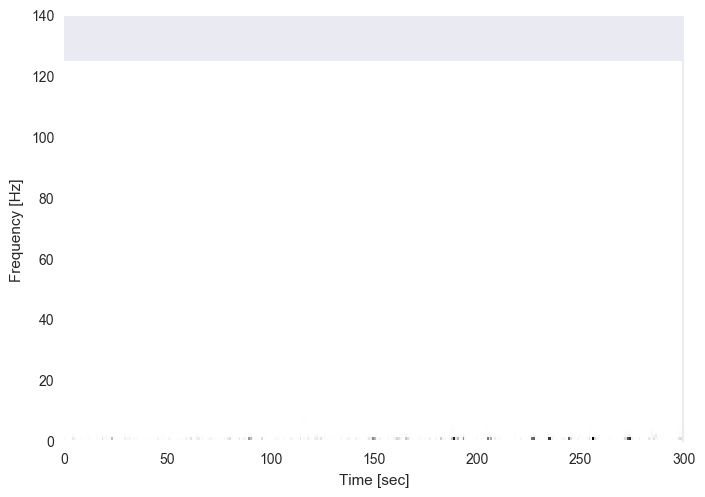

In [15]:
f, t, Sxx = spectrogram(xmin, fs)
plt.pcolormesh(t, f, np.abs(Sxx).astype(np.double))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [16]:
spec = np.abs(Sxx).astype(np.double)

In [17]:
spec1 = np.sum(spec[f<=4])
spec2 = np.sum(spec[np.logical_and(f>=4, f<=7)])
spec3 = np.sum(spec[np.logical_and(f>=8, f<=12)])
spec4 = np.sum(spec[np.logical_and(f>=8, f<=15)])
spec5 = np.sum(spec[np.logical_and(f>=16, f<=31)])
spec6 = np.sum(spec[f>=32])

In [18]:
x = fulldf[fulldf.DEVICE==0.0].iloc[:,2:-2].transpose()
y = fulldf[fulldf.DEVICE==0.0]['TARGET']

In [19]:
x

,0,1,2,3,5,6,7,8,9,10,...,571,572,573,574,575,576,577,578,579,580
EEG_0,18.513157,3.377115,20.753752,14.535362,2.157661,-22.688078,8.684734,-13.450840,2.217397,-6.429669,...,10.270883,-11.435924,8.220113,-34.098873,-13.360628,-7.317586,-1.963060,5.164744,28.942640,-1.153726
EEG_1,17.887674,3.720635,33.122223,14.571295,0.553162,-20.044596,7.225457,-12.854297,4.484025,-8.082881,...,11.439771,-8.414603,7.835303,-33.069038,-14.830888,-6.972183,-1.816330,5.543702,28.656162,-1.563376
EEG_2,17.442404,4.122524,41.263256,14.288245,-1.216814,-18.404722,6.008805,-12.293760,6.651739,-9.513608,...,11.892747,-6.328361,7.786192,-31.574335,-16.504591,-6.781844,-1.552267,5.813359,28.795704,-1.925451
EEG_3,16.944677,4.086743,44.764065,13.808476,-3.066420,-17.891281,5.098927,-11.689228,8.349331,-10.704005,...,11.009637,-1.327069,7.979493,-29.748417,-18.352978,-6.778825,-1.403080,6.073490,29.374699,-1.931539
EEG_4,16.080168,3.476264,45.441994,13.219709,-4.871763,-17.701622,4.470098,-11.025227,9.585050,-11.474572,...,8.917665,-1.967256,8.256405,-27.706280,-20.392750,-6.967163,-1.586505,6.417375,30.014372,-1.502166
EEG_5,15.002975,2.501397,44.729267,12.498644,-6.431633,-17.365948,4.015224,-10.463305,10.654525,-11.689718,...,6.437304,0.391124,8.415716,-25.950323,-22.608484,-7.270115,-2.107004,6.916029,30.361300,-1.010963
EEG_6,13.949936,1.601755,42.983265,11.697461,-7.552323,-16.553183,3.712195,-10.184059,11.748752,-11.549228,...,4.277024,-0.800394,8.356942,-23.914667,-24.733067,-7.549890,-2.866153,7.533914,30.465618,-0.841286
EEG_7,13.029482,0.721100,40.561638,10.954629,-8.112910,-14.829457,3.736494,-10.152052,12.789876,-11.317899,...,2.657276,-3.271557,8.097944,-22.049320,-26.460922,-7.637288,-3.654064,7.934259,30.569614,-1.033790
EEG_8,12.247584,-0.046621,38.125534,10.445107,-8.398348,-13.244513,4.300038,-10.212206,13.732861,-11.113110,...,2.063724,-2.313347,7.632531,-20.815788,-27.560293,-7.545880,-4.115348,7.791385,30.716202,-1.491226
EEG_9,11.452194,0.084056,35.606266,10.253219,-8.738887,-12.503526,5.321576,-10.277376,14.492736,-10.946260,...,2.715275,-5.716259,7.061453,-20.270260,-27.838100,-7.333826,-4.159715,7.152590,30.792763,-2.060281


In [20]:
def read_EEG(df):
    EEG = df.iloc[:,2:-2]
    return EEG

def EEG_feat(df):
    fs = 75000/(5*60)
    eeg_df = DataFrame()
    eeg = read_EEG(df)
    eeg_df['Delta'] = eeg.apply(lambda row: freqband_energy(row, 0, 4), axis=1)
    eeg_df['Theta'] = eeg.apply(lambda row: freqband_energy(row, 4, 7), axis=1)
    eeg_df['Alpha'] = eeg.apply(lambda row: freqband_energy(row, 8, 15), axis=1)
    eeg_df['Beta'] = eeg.apply(lambda row: freqband_energy(row, 16, 31), axis=1)
    eeg_df['Delta'] = eeg.apply(lambda row: freqband_energy(row, 32, fs), axis=1)
    eeg_df['Mu'] = eeg.apply(lambda row: freqband_energy(row, 8, 12), axis=1)
    return eeg_df

def freqband_energy(vect, lband, uband, duration=5*60):
    fs = len(vect)/duration;
    f, t, Sxx = spectrogram(vect, fs)
    spec = np.abs(Sxx).astype(np.double)
    ene = np.sum(spec[np.logical_and(f>=lband, f<=uband)])
    return ene;

def score_function(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [21]:
EEG_feat(fulldf0)

,Delta,Theta,Alpha,Beta,Mu
0,134.351088,6118.156620,3084.586147,773.499306,2452.048542
1,141.430473,4686.426748,4721.542910,1772.463344,3251.003836
2,142.979718,117946.897544,40305.449631,2310.632507,35663.288638
3,4.395545,2652.760543,566.162029,68.209802,463.719605
5,4.657099,2230.495526,1158.521660,100.382615,977.149243
6,121.354933,4869.981689,4295.031066,1666.171282,2987.226569
7,8.622547,5154.639778,1740.909410,142.886926,1481.708940
8,4.313169,1454.972200,671.822069,65.600597,557.999889
9,11.564033,4219.031907,2175.556203,165.006149,1949.099592
10,3.597161,2461.622970,1678.774760,69.546177,1438.488947


In [22]:
features = EEG_feat(fulldf0)

In [23]:
clf = svm.SVR(kernel = 'linear', verbose = True)

In [25]:
special_loss  = metrics.make_scorer(score_function, greater_is_better=False)

In [ ]:
nb_train = len(y)
scores = cross_val_score(clf, features.iloc[0:nb_train,:], y.iloc[0:nb_train], cv=5, scoring=special_loss)

[LibSVM]

In [ ]:
scores